In [11]:
import pandas as pd
df=pd.read_csv('Cleaned_data.csv')

In [12]:
df.head()

,RAM,typeRam,CPU_Modifier,CPU_Generation,STOCKAGEHDD,STOCKAGESSD,POIDS,PRIX,_Accent,_Acer,...,_intel hd graphics 4400,_intel hd graphics 5500,_intel iris xe,_intel uhd 600,COULEUR_blanc,COULEUR_bleu,COULEUR_gris,COULEUR_noir,COULEUR_noirgris,COULEUR_rose
0,4,1.0,3.0,4.0,0.0,0.0,242.0,1499.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8,2.0,5.0,6.0,0.0,256.0,128.0,2490.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,16,2.0,5.0,6.0,0.0,0.0,15.0,2899.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8,1.0,5.0,4.0,500.0,0.0,2.0,1999.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,16,2.0,5.0,6.0,0.0,256.0,16.0,2599.0,0,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

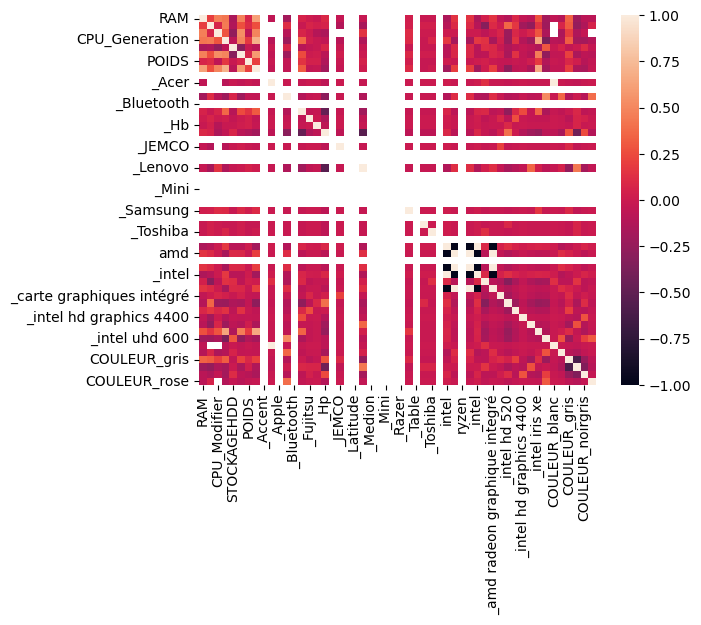

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())